Projeto de modelagem preditiva usando **Python** e **tensorflow**, buscando prever o valor médio de casas ocupadas pelo proprietário em $1.000.



In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.11


In [2]:
# Instala o TensorFlow
!pip install -q tensorflow==2.5

In [3]:
# Instala o Pydot
!pip install -q pydot

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

49152/49082 [==============================] - 0s 1us/step


In [7]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [8]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [9]:
dataset.shape


(506, 14)

In [10]:
dataset.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

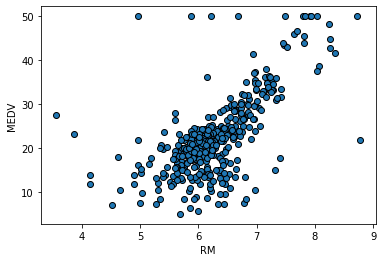

In [12]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [13]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']


In [14]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

In [15]:
# Cria o modelo 
modelo = modelo_linear()

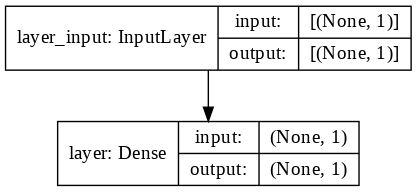

In [17]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                           
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

In [18]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))


Checkpoint salvo a cada 81000 amostras


In [19]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [20]:
# Lista para as previsões
predictions_list = []

In [21]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [22]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [23]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [24]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 1s 177ms/step - loss: 358.5850 - mae: 16.9966 - mse: 358.5850 - val_loss: 434.5244 - val_mae: 18.2389 - val_mse: 434.5244
Epoch 2/4000
2/2 [==============================] - 0s 23ms/step - loss: 353.5551 - mae: 16.8514 - mse: 353.5551 - val_loss: 429.1119 - val_mae: 18.0931 - val_mse: 429.1119
Epoch 3/4000
2/2 [==============================] - 0s 22ms/step - loss: 348.5566 - mae: 16.7068 - mse: 348.5566 - val_loss: 423.7514 - val_mae: 17.9475 - val_mse: 423.7514
Epoch 4/4000
2/2 [==============================] - 0s 24ms/step - loss: 343.4852 - mae: 16.5624 - mse: 343.4852 - val_loss: 418.4393 - val_mae: 17.8021 - val_mse: 418.4393
Epoch 5/4000
2/2 [==============================] - 0s 27ms/step - loss: 338.5584 - mae: 16.4189 - mse: 338.5584 - val_loss: 413.1641 - val_mae: 17.6565 - val_mse: 413.1641
Epoch 6/4000
2/2 [==============================] - 0s 25ms/step - loss: 333.7205 - mae: 16.2748 - mse: 333.7205 - val_loss: 407.9333 

In [25]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [26]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [27]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [28]:
df.head()

,MSE em Treino,MSE em Validação
0,358.584991,434.524384
1,353.555115,429.111908
2,348.556580,423.751434
3,343.485229,418.439301
4,338.558411,413.164062


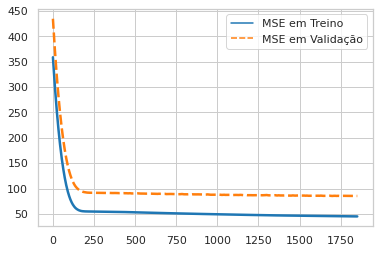

In [29]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [30]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [31]:
# Imprime as previsões
previsoes

array([21.022964 , 18.71967  , 23.815353 , 21.40969  , 20.715855 ,
       20.80685  , 24.384068 , 21.961346 , 21.17083  , 20.988842 ,
       25.64093  , 23.371754 , 21.36988  , 22.717735 , 23.212517 ,
       21.688358 , 26.727177 , 23.303513 , 29.053219 , 20.152828 ,
       20.59074  , 21.119644 , 19.470371 , 21.022964 , 19.254257 ,
       23.451378 , 22.854225 , 14.892217 , 17.610672 , 34.5072   ,
       21.574615 , 18.566116 , 20.198326 , 22.791668 , 31.038033 ,
       24.20208  , 21.870346 , 27.699677 , 25.549934 , 31.66362  ,
       27.29589  , 30.156528 , 31.538506 , 17.610672 , 23.036213 ,
       23.235264 , 18.685543 , 23.491188 , 36.378273 , 34.638    ,
       18.497868 , 34.0636   , 30.617188 , 25.697803 , 23.576492 ,
       22.791668 , 25.89685  , 27.52906  , 24.583118 , 24.224827 ,
       23.138584 , 19.33957  , 23.360382 , 22.797356 , 21.21064  ,
       20.403065 , 21.335758 , 22.20589  , 21.72248  , 21.637177 ,
       26.778358 , 24.691177 , 11.718785 , 14.630609 , 17.5310